In [1]:
import pandas as pd

In [11]:
user_data = pd.read_csv('/Users/7101947/Desktop/project/user_data.csv')
logs = pd.read_csv('/Users/7101947/Desktop/project/logs.csv')
user_data.shape
logs.shape

(4500, 4)

In [45]:
user_data.head()

client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49

In [46]:
logs.head()

client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629

In [44]:
logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success':'count'})\
    .sort_values('success', ascending=False)\
    .head(10)


client  success
332    12179       41
1758   61468       41
1487   52870       41
1759   61473       41
2626   92584       41
2345   82563       41
2231   78349       41
1020   36165       41
810    28719       41
1826   64064       40

In [48]:
logs.query('success == True') \
    .groupby('platform', as_index=False) \
    .agg({'success':'count'})\
    .sort_values('success', ascending=False)\
    .head(1)

platform  success
1    phone     2019

In [55]:
logs.merge(user_data, how='inner', on = 'client') \
    .query('premium == True') \
    .groupby(['platform'], as_index = False) \
    .agg({'success':'count'}) \
    .rename(columns = {'success':'orders','platform':'platform_premium_clients'})\
    .sort_values('orders',ascending=False)\
    .head(1)

platform_premium_clients  orders
1                    phone     246

In [56]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

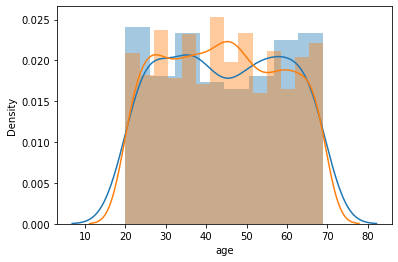

In [69]:
data = pd.read_csv('/Users/7101947/Desktop/project/user_data.csv')
sns.distplot(data.query('premium == True').age)
sns.distplot(data.query('premium == False').age)

In [63]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

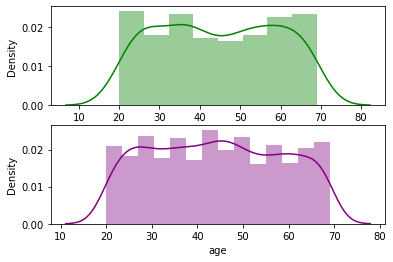

In [71]:
fig, ax = plt.subplots(nrows=2,ncols=1)
sns.distplot(data.query('premium == True').age, ax=ax[0], color='green')
sns.distplot(data.query('premium == False').age, ax=ax[1], color = 'purple')

In [83]:
data = logs.merge(user_data, how='inner', on = 'client')
data

client  success  platform        time  premium  age
0      61468     True     phone  1585425658    False   25
1      61468     True  computer  1585460504    False   25
2      61468     True  computer  1585430291    False   25
3      61468     True  computer  1585444317    False   25
4      61468     True     phone  1585441266    False   25
...      ...      ...       ...         ...      ...  ...
3434   62438    False     phone  1585479041    False   36
3435   95152     True  computer  1585420263    False   67
3436   64496    False  computer  1585459072    False   66
3437    8967     True     phone  1585465121    False   33
3438   40921     True     phone  1585437692    False   45

[3439 rows x 6 columns]

In [84]:
client_suc = data.groupby('client', as_index=False) \
    .agg({'success':'sum'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

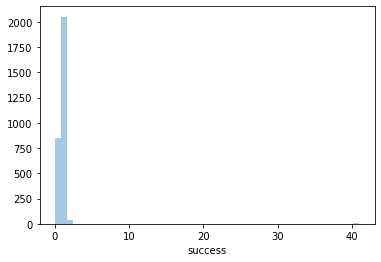

In [88]:
sns.distplot(client_suc.success, kde = False)

In [96]:
agg = data.query('platform=="computer"') \
    .groupby('age', as_index = False) \
    .agg({'success':'sum'})
agg.head()

age  success
0   20       11
1   21       15
2   22        8
3   23       15
4   24       26

<AxesSubplot:xlabel='age', ylabel='success'>

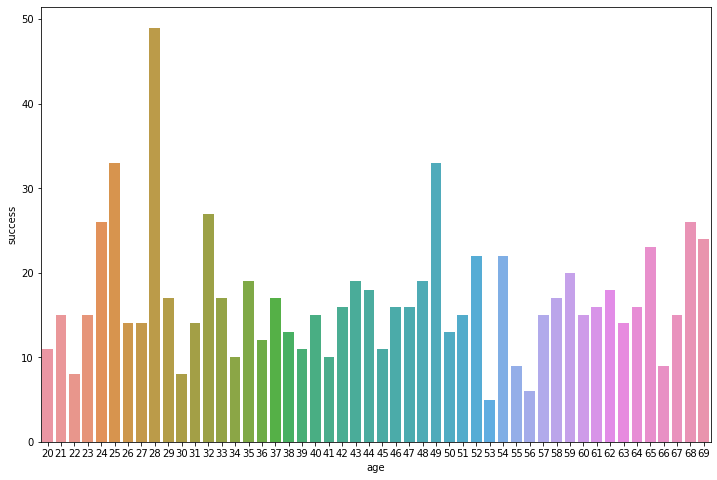

In [98]:
plt.figure(figsize=(12, 8))
sns.barplot(x=agg.age, y = agg.success)